In [1]:
import drawSvg as draw
from random import randint, random

/Users/hfarid/Library/Python/3.9/lib/python/site-packages/drawSvg/raster.py:25: RuntimeWarning: CairoSVG will need to be installed to rasterize images: Install with `pip3 install cairosvg`
Original ImportError: No module named 'cairocffi'
  warnings.warn(msg, RuntimeWarning)


In [5]:
# Ball class
class Ball:
    def __init__(self, start_x, start_y, start_v_x, start_v_y, color='blue'):
        # Ball location, velocity, and color
        self.x = start_x
        self.y = start_y
        self.v_x = start_v_x
        self.v_y = start_v_y

    def update_position(self, timestep=1):
        self.x = self.x + timestep * self.v_x
        self.y = self.y + timestep * self.v_y 
        if( self.y <= -CANVAS_HEIGHT/2+BALL_RADIUS ): # bounce ball off floor
            self.v_y = -self.v_y
            self.y = self.y + timestep * self.v_y

    def update_velocity(self, timestep=1):
        self.v_y = self.v_y + timestep * EARTH_GRAVITY_ACCELERATION

    def animate_step(self, timestep=1):
        self.update_position(timestep)
        self.update_velocity(timestep)

    def draw_ball(self): # assumes canvas (D) has been created
        D.append(draw.Circle(self.x, self.y, BALL_RADIUS, fill=self.color))  

the x-coordinate is  5.0
the y-coordinate is  5.0
the x-coordinate is  8.0
the y-coordinate is  11.0
the y-velocity is  -3.8000000000000007


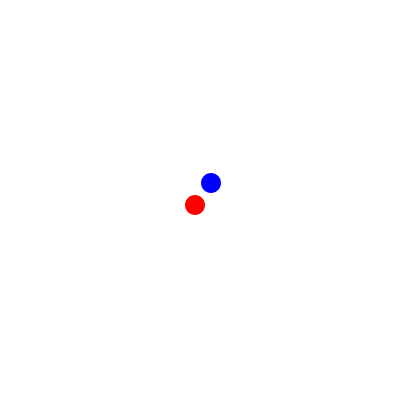

In [39]:
# test Ball class
CANVAS_WIDTH  = 400
CANVAS_HEIGHT = 400
EARTH_GRAVITY_ACCELERATION = -9.8   # acceleration due to gravity, m/sec^2
BALL_RADIUS = 10  # radius of the ball in pixels
D = draw.Drawing(CANVAS_WIDTH, CANVAS_HEIGHT, origin='center') # define drawing canvas

ball1 = Ball(5.0, 5.0, 3.0, 6.0)
print( "the x-coordinate is ", ball1.x)
print( "the y-coordinate is ", ball1.y)

ball1.update_position()
print( "the x-coordinate is ", ball1.x)
print( "the y-coordinate is ", ball1.y)

ball1.animate_step()
print( "the y-velocity is ", ball1.v_y)

ball1.draw_ball()

ball2 = Ball(-5.0, -5.0, -3.0, -6.0, "red")
ball2.draw_ball()
D

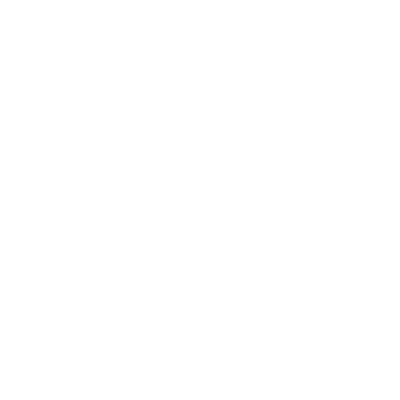

In [ ]:
# simple two-Ball animation
ball1 = Ball(5.0, 5.0, 10.0, 20.0, "green")
ball2 = Ball(-5.0, -5.0, -10.0, 20.0, "red")

def draw_frame():
    ball1.draw_ball()
    ball2.draw_ball()
    return D

for i in range(0,500):
    D = draw.Drawing(CANVAS_WIDTH, CANVAS_HEIGHT, origin='center') # erase canvas
    
    with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame()
        
    ball1.animate_step(0.1)
    ball2.animate_step(0.1)

In [34]:
# Bouncing Ball Pit
CANVAS_WIDTH  = 500
CANVAS_HEIGHT = 500
BALL_RADIUS   = 10  # radius of the ball in pixels
EARTH_GRAVITY_ACCELERATION = -9.8   # acceleration due to gravity, m/sec^2

def draw_frame():
    for b in ball_list:
        b.draw_ball();
    for b in ball_list:
        b.animate_step(0.2)
    return D    

# build ball pit
ball_list = []; # initialize empty list
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
for i in range(1,200):
    x  = randint(-CANVAS_WIDTH/2,CANVAS_WIDTH/2)
    y  = randint(-CANVAS_HEIGHT/2,CANVAS_HEIGHT/2)
    vx = 20*random() - 10
    vy = 20*random() - 10
    c  = randint(0,len(colors)-1)
    ball_list.append( Ball(x, y, vx, vy, colors[c]) )

# animate ball pit
for i in range(0,500):
    D = draw.Drawing(CANVAS_WIDTH, CANVAS_HEIGHT, origin='center' ) # erase canvas
    with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
        anim.draw_frame()

TypeError: animate_step() takes 1 positional argument but 2 were given